Projet ARF - inpainting

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

Préambule

In [14]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

In [15]:
X_train, y_train = load_usps("USPS_train.txt")
X_test, y_test = load_usps("USPS_test.txt")

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
ri = Ridge()
ri.fit(X_train,y_train)
la = Lasso()
la.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
print("Comparison of accuracies")
cv=4
print("Linear Regression : ",100*sum(cross_val_score(lr,X_train,y_train,cv=cv))/cv,"%","et nb coeffs non nuls : ",len(np.where(lr.coef_!=0)[0]))
print("Ridge Regression : ",100*sum(cross_val_score(ri,X_train,y_train,cv=cv))/cv,"%","et nb coeffs non nuls : ",len(np.where(ri.coef_!=0)[0]))
print("Lasso Regression : ",100*sum(cross_val_score(la,X_train,y_train,cv=cv))/cv,"%","et nb coeffs non nuls : ",len(np.where(la.coef_!=0)[0]))

Comparison of accuracies
Linear Regression :  61.31002962482734 % et nb coeffs non nuls :  256
Ridge Regression :  61.347665819273836 % et nb coeffs non nuls :  256
Lasso Regression :  8.452891986755844 % et nb coeffs non nuls :  3


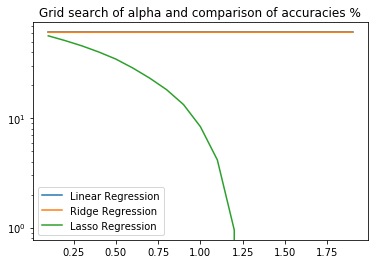

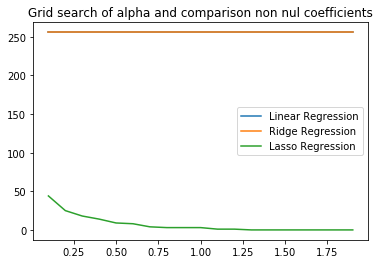

In [41]:
x = []
cv=3
y_lr = []
y_ri = []
y_la = []
for i in range(1,20):
    xx = i/10
    lr = LinearRegression()
    ri = Ridge(alpha=xx)
    la = Lasso(alpha=xx)
    x.append(xx)
    y_lr.append(100*sum(cross_val_score(lr,X_train,y_train,cv=cv))/cv)
    y_ri.append(100*sum(cross_val_score(ri,X_train,y_train,cv=cv))/cv)
    y_la.append(100*sum(cross_val_score(la,X_train,y_train,cv=cv))/cv)
plt.plot(x,y_lr,label="Linear Regression")
plt.plot(x,y_ri,label="Ridge Regression")
plt.plot(x,y_la,label="Lasso Regression")
plt.title("Grid search of alpha and comparison of accuracies %")
plt.yscale('log')
plt.legend()
x = []
plt.figure()
y_lr = []
y_ri = []
y_la = []
for i in range(1,20):
    xx = i/10
    lr = LinearRegression()
    ri = Ridge(alpha=xx)
    la = Lasso(alpha=xx)
    x.append(xx)
    lr.fit(X_train,y_train)
    ri.fit(X_train,y_train)
    la.fit(X_train,y_train)
    y_lr.append(len(np.where(lr.coef_!=0)[0]))
    y_ri.append(len(np.where(ri.coef_!=0)[0]))
    y_la.append(len(np.where(la.coef_!=0)[0]))
plt.plot(x,y_lr,label="Linear Regression")
plt.plot(x,y_ri,label="Ridge Regression")
plt.plot(x,y_la,label="Lasso Regression")
plt.title("Grid search of alpha and comparison non nul coefficients")
plt.legend()